# S1 2021 CSC8001: Assignment 2
# Part B [80 marks]


**You Tasks**: 

Answer the **five** questions by completing the five functions **b11, b12, b13, b21, b22** below.

You can test your code as shown in **"Example"** in each question.

The data files and pictures you need for Part B are available in the `csc8001a2data` folder. If a larger and clearer view is needed for any of the pictures in this assignment, please open it from the `csc8001a2data` folder.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

# B1: Fuel efficiency [43 total marks]
For this problem we're going to use the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Auto MPG Data set to explore the association between a car's horsepower and its fuel efficiency.

## B1.1 Load data [9 marks]
For the `b11()` function below: load the Auto MPG data into a Data Frame, clean data as required, and return the Data Frame:

- The `auto-mpg.data` data file and its data description, `auto-mpg.names`, are available in `csc8001a2data` folder. 

- You are required to write Pandas code to read the date from the file `auto-mpg.data` before forming a Data Frame.

- You need column names for the Data Frame. Please Use the `Attribute Information` names provided in `auto-mpg.names` for your Data Frame's column names (you can use these names directly without writing code to read the file `auto-mpg.names`).  For two word attribute names, please use the 2nd word only: `year` for `model year` and `name` for `car name`. There are `9` columns in total.

**Example:** Please test your `b11()` code by running:

`auto = b11()
 auto.shape `

where the expected output should be: 

`(392,9)`


*Hint: Review the course material on Pandas (how to read a file, how to form a Data Frame, etc.)*.

In [2]:
def b11():
    # Your Code, Docstring and Comments Here
    # Writting the attribute information to use them as the headers of the data frame
    names_df = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model', 'origin', 'name']
    
    #Loading the auto-mpg file,setting the headers and reading Invalid values
    df = pd.read_csv('csc8001a2data/auto-mpg.data', sep='\s+', header=None, 
                     names=names_df, na_values='?')
    
    #re-saving Data Frame to a inicial variable without invalid data
    df = df.dropna(axis=0, how='any')
    df
    
    #exporting the data frame 
    return df
    
    pass
    
    

In [3]:
auto = b11()
auto.shape

(392, 9)

### B1.2 Multi-axes histogram chart [17 marks]
To help us explore the association between a car's horsepower and its fuel efficiency, your are tasked to write your `b12()` function which creates a multi-axes histogram chart plotting `horsepower` vs `mpg`.

Your `b12()` function should:
- call the `b11()` function to retrieve the auto-mpg Data Frame (you formed in `b11()`) 
- use `seaborn-whitegrid` style, just for this b12 plot (i.e., not for any other question in this assignment)
- Figure size is 8 by 8.
- Bin size of each histogram is 20.
- Marker style is "D" (diamond)
- *Hint: Review the course material: 04.11 Settings and Stylesheets and 04.08 Multiple Subplots*.
- create a plot similar to the one shown below (i.e., **Example** for your testing)




<img src="csc8001a2data/b12.PNG" width=488 height=375 align=left />

In [4]:
def b12():
    # Your code/docstring & comments here to create multi-axes histogram chart 
    #Adding the seaborn-style of the matplotlib library
    plt.style.use('seaborn-whitegrid')
    
    #loading the data horsepower and mpg from the Data Frame
    auto = b11()
    hrspw = auto['horsepower']
    mpg = auto['mpg']
    
    #Creating the figure 
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle('Fuel Eficiency: Horse power vs Miles per Galon', fontsize=16)
    
    #setting up the grid 
    grid = plt.GridSpec(6,4,wspace=0.3, hspace=0.3)
    
    #Adding subplots with specific sizes to match the example given
    main_ax = fig.add_subplot(grid[1:4, 0:3])
    y_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
    x_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
    
    
    #plotting, 
    #main plot scatter plot horsepower vs mpg
    main_ax.plot(hrspw, mpg, 'D', markersize=1, color='steelblue')
   
    
    # horsepower histogram 
    y_hist.hist(hrspw, bins=20, histtype='stepfilled', orientation='vertical', color='steelblue')
    y_hist.set_ylabel('horsepower')
    y_hist.axes.yaxis.set_ticks([])
    
    # miles per galon histogram
    x_hist.hist(mpg, bins=20, histtype='stepfilled', orientation='horizontal', color='steelblue')
    x_hist.set_title('mpg')
    x_hist.axes.xaxis.set_ticks([])
    
    pass


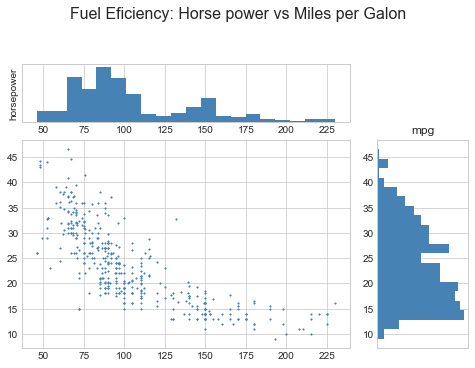

In [5]:
b12()

### B1.3: Two-dimensional histogram [17 marks]
Continuing our explorations into the association between a car's horsepower and its fuel effiecincy, by writing your `b13()` function:

Your `b13()` function should:
- call the `b11()` function to retrieve the auto-mpg Data Frame 
- use Matplotlib's `hist2d()` function to generate a two-dimensional histogram of `mpg` vs `horsepower`.  

Additional plot criteria:
  - Plot `horsepower` on the horizontal axis and `mpg` along the vertical axis.
  - Figure size: 10 by 5
  - 25 bins
  - Plot range values for horsepower between 40 and 235, and mpg between 5 and 50.
   - Colorbar with an appropriate color map 
   - Appropriate labels


*Hint: Review the course material on how to plot a histogram with Matploitlib, particularly a two-dimensional histogram.*.

**Example**:
The picture should be similar to the one shown below:

<img src="csc8001a2data/b13.PNG" width=488 height=375 align=left />



In [6]:
def b13():
    #importing the data frame
    auto = b11()
    hrspw = auto['horsepower']
    mpg = auto['mpg']
    
    #setting up the data from the values given in instructions using "masking values"
    hrspw_new = hrspw[(hrspw > 40) & (hrspw < 235)]
    mpg_new = mpg[(mpg > 5) & (mpg < 50)]
    
    #creating the figure and setting size
    fig = plt.figure(figsize=(10,5))
    
    #adding title 
    fig.suptitle('Fuel Eficiency: Horse power vs Miles per Galon')
    
    #plotting with function hist2d and setting wight color 
    plt.hist2d(hrspw_new, mpg_new, bins=25, cmap='Reds')
    
    #adding labels  
    plt.ylabel('Miles per Galon (MGP)')
    plt.xlabel('Horsepower')
    
    #setting colorbar
    cb = plt.colorbar()
    cb.set_label('count in bin')

    
    pass 
    return plt.show()

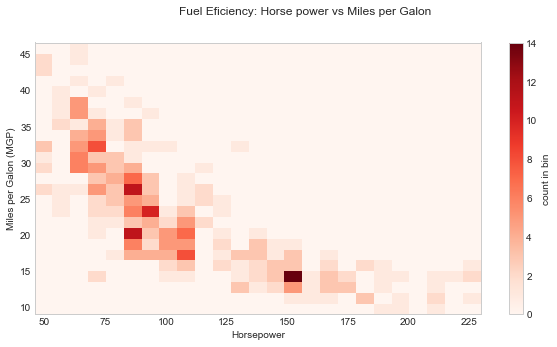

In [7]:
b13()

# B2: Birthdays [37 total marks]
For this problem we will be analysing and visualising U.S. birth data as an homage to Matt Stiles's ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/) article.  Our chart will use the birth data gathered by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/births): 

There are two birth data files, both available in the assignment `csc8001a2data` folder:

- `US_births_1994-2003_CDC_NCHS.csv`: <br>
   Births from 1994 to 2003 (Centers for Disease Control and   Prevention's National Center for Health Statistics)

- `US_births_2000-2014_SSA.csv`: <br>
   Births from 2000 to 2014 (Social Security Administration)

Both files have the following structure:

| year |	month |	date_of_month |	day_of_week	 | births |
|:---|:---|:---|:---|:---|
| 1994 |	1 |	1 |	6 |	8096 |
 |1994 |	1 |	2 |	7 |	7772 |
 |1994 |	1 |	3 |	1 |	10142 |
 |1994 |	1 |	4 |	2 |	11248 |


### B2.1 Load data [17 marks]
Complete the `b21()` function below which should provide the following functionality:
- Load data from the two files into one Data Frame and clean as required.
- Return a Data Frame with multiple indexes for `month` and `date_of_month` and a `births` column which has the average daily births from 1994-2014. 


*Hint: Review the course material: *03.05 Hierarchical Indexing*.

**Example** Please test your `b21()` code by running `b21().tail()`, whereas the expected output should be as follows:


<img src="csc8001a2data/b21.PNG" width=221 height=199 align=left />


In [8]:
def b21():
    # Your code/docstring & comments here
    #importing databases 
    Data1= pd.read_csv('csc8001a2data/US_births_1994-2003_CDC_NCHS.csv')
    Data2 = pd.read_csv('csc8001a2data/US_births_2000-2014_SSA.csv')
    
    #concatenating data
    dF = pd.concat((Data1,Data2), ignore_index=True)
    
    #set the multi indexing
    dF = dF.set_index(['month', 'date_of_month'])
    
    #dropping the columns not used in this data frame 
    dF = dF.drop(columns=['year', 'day_of_week'])
    dF.sort_index(inplace=True)
    
    #grouping the results according their months and getting the average birth per day 
    dF = dF.groupby(['month','date_of_month']).mean('births')
    
    
    return dF
    pass

In [9]:
b21().tail()

births
month date_of_month          
12    27             11792.48
      28             11758.76
      29             11815.84
      30             11791.08
      31             10462.12

### B2.2 Plot data [20 marks]
Create a heatmap style plot similar to the one as shown in **Example** below, from Matt Stiles's article: ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/). 

Additional criteria:
 - Use `b21()` function to load data 
 - You are not allowed to directly apply the following Matplotlib bulit-in function: `seaborn.heatmap()`
 - figsize is `16 by 6`
 - Add appropriate labels. 
   - X-axis labels should be on the top of the plot.
 - Distribution of average daily births per month/day should be similar to the aforementioned article's.
 - For the color bar select the appropriate discrete values and color limits. Indicate out-of-bounds values with a triangular arrow.
    - Do not need to duplicate article's color map or colorbar placement. 
 
 
*Hint: You may find the following recources useful*:
- Matt Stiles's article: ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/).
- [Creating annotated heatmaps](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) 
- Course material: 04.07 Customizing Colorbars (from course material)


**Example**:
The picture should be similar to the one shown below:

<img src="csc8001a2data/b22.PNG" width=738 height=343 align=left/> <br>

In [10]:
def b22():
    # Your code/docstring & comments here
    
    #retrieving data from b21 function         
    dt = b21()      
    births = dt.values
    vmin = min(births)
    vmax = max(births)
    
    #list with months for to replace the ticklabels
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    #adding figure and subplot
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(1,1,1)
    
    #adding title and setting it up to the bottom of the heatmap
    fig.suptitle('U.S Average Daily Births: 1994 - 2014',x=0.5, y=.09, ha='center', size='x-large')
    
    #reseting index to a format readable by the plot
    df2 = dt.reset_index().pivot(columns='date_of_month', index='month', values='births')
    #setting the normalize options as a good pratice, for mapping the color according to the 
    #min and max data value. However this will be overwrite by the descrete values and color limits
    normalize = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    
    #plotting the heatmap with the function pcolor and adding more arguments to make it as 
    #close as posible to the given example
    htmap = ax.pcolor(df2.columns, df2.index, df2.values, norm=normalize, 
                      cmap=plt.cm.get_cmap('Blues', 10), edgecolors='white', 
                      linewidth=4, shading='auto' )
    
    #moving x-label to the top of the plot
    ax.xaxis.set_ticks_position('top')
    
    #setting up ticks and labels 
    ax.tick_params(which='both', width=2, length=2, color='k', labelsize=12)
    ax.set_yticks(df2.index)
    ax.set_yticklabels(months)
    ax.invert_yaxis()
    ax.set_xticks(df2.columns)    
   
    #plottiong the colorbar. By default ticks are sustracted from the data values. However in order 
    #to make the plot similar to the example, I used fixed data. 
    clbr = fig.colorbar(htmap,ticks=[9500,11000,12400],extend='both', 
                        orientation='horizontal',
                        pad=0.2, shrink=0.7)
    clbr.set_ticklabels(['<9.5k', '11k', '>12.4k'])
    clbr.ax.tick_params(labelsize=14)
    
    #please note that I could use the vmin and vmax variables which uses the max and min of the 
    #actual data, but the result plot colormap was slightly different from the example, 
    #I decided to use fixed values to set up the heatmap limits.
    #The original line of code was: #htmap.set_clim(vmin, vmax)
    htmap.set_clim(9500, 12400)
    
   
   
    
    return plt.show()
    pass 

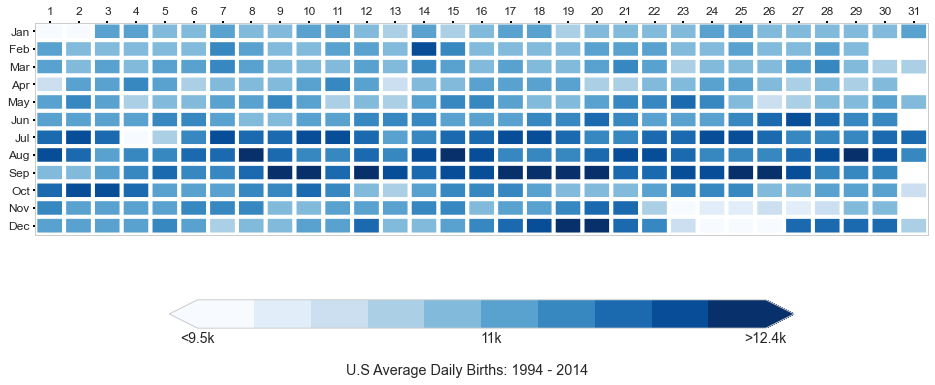

In [11]:
b22()

Parts of this assignment were based on/adapted from:
- "Some People Are Too Superstitious To Have A Baby On Friday The 13th", [FiveThirtyEight](https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/), 13 May 2016.
- "How Common is Your Birthday", [The Daily Viz](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/), Matt Stiles, September 17, 2016